**Name: Priyanka A** <br>
**School: Computing and Data Sciences** <br>
Email: priyanka.a-26@scds.saiuniversity.edu.in

<div></div>

### Dataset

The Car Images Dataset dataset is used for this project. 

The dataset is split into 75% training and 25% testing.

1. Total images: 4165
2. Classes: 7 ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
3. Images per class: [1013, 338, 391, 385, 526, 547, 965]
4. Training samples: 3123, Testing samples: 1042



### Pretrained models

Task is to train the following three pretrained CNN models by applying both Transfer-Learning and Fine-Tuning.
1. Model-1: ResNet101V2
2. Model-2: InceptionResNetV2
3. Model-3: DenseNet201

# Part 1
# Model-2: InceptionResNetV2
Subtask 1: 
*Apply the following modifcations to the default classifier layers of the model during Transfer-Learning:*

1. Model-2 → **Include a Batch Normalization and Dropout layer with 35% drop rate before the output layer**.
2. Train the model for **10 epochs**, and preserve the best performing TL model using the callback.
Use 10% of the training dataset for validation.

Total images: 4165
Classes: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
Images per class: [1013, 338, 391, 385, 526, 547, 965]
Training samples: 3123, Testing samples: 1042
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 61s 404ms/step - accuracy: 0.4687 - loss: 1.7803 - val_accuracy: 0.6550 - val_loss: 1.0096
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.7313 - loss: 0.8471 - val_accuracy: 0.7412 - val_loss: 0.7648
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.7658 - loss: 0.6815 - val_accuracy: 0.7859 - val_loss: 0.6551
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.8187 - loss: 0.5518 - val_accuracy: 0.8147 - val_loss: 0.6093
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.8281 - loss: 0.5094 - val_accuracy: 0.8435 - val_loss: 0.5645
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.8405 -

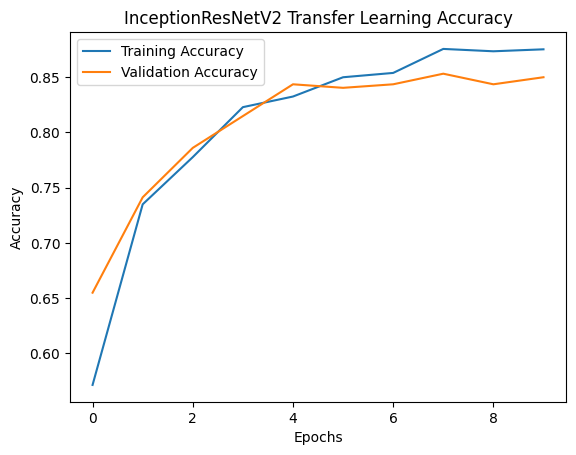

33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.8714 - loss: 0.4400
Test Loss: 0.519995927810669, Test Accuracy: 0.850287914276123


In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Subset the dataset
# Assuming dataset is unzipped and organized as mentioned in the description
dataset_path = "../input/car-images-dataset/Car_Dataset"
categories = ["Audi", "Hyundai Creta", "Mahindra Scorpio", "Rolls Royce", "Swift", "Tata Safari", "Toyota Innova"]

# Load images and labels
images, labels = [], []
for i, category in enumerate(categories):
    image_files = glob(os.path.join(dataset_path, category, "*.jpg"))
    selected_files = image_files[:]  # Select subset number of samples per category (Here we are selecting all images, ie full dataset)
    for file in selected_files:
        img = Image.open(file).convert("RGB")  # Ensure all images are RGB
        img = img.resize((224, 224))  # Resizing for model input
        images.append(np.array(img))
        labels.append(i)

# Convert to numpy arrays
images = np.array(images) / 255.0  # Normalize
labels = np.array(labels)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, stratify=labels, random_state=42)

# Check dataset details
print(f"Total images: {len(images)}")
print(f"Classes: {categories}")
print(f"Images per class: {[labels.tolist().count(i) for i in range(len(categories))]}")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Build the model using InceptionResNetV2
base_model = keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Add custom classifier layers
global_avg_pooling = layers.GlobalAveragePooling2D()(base_model.output)
batch_norm = layers.BatchNormalization()(global_avg_pooling)
dropout = layers.Dropout(0.35)(batch_norm)
output_layer = layers.Dense(len(categories), activation='softmax')(dropout)

model = keras.models.Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
callbacks = [
    keras.callbacks.ModelCheckpoint("inceptionresnetv2_tl_best.keras", save_best_only=True, monitor='val_accuracy'),
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
]

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    callbacks=callbacks
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('InceptionResNetV2 Transfer Learning Accuracy')
plt.show()

# Evaluate the model on the test set
model.load_weights("inceptionresnetv2_tl_best.keras")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

#model.summary()


In [2]:
model.save("/kaggle/working/inceptionresnetv2_tl_best.keras")